In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [120]:
moviesDF = pd.read_csv('DataBases/clean_movies_genres.csv', delimiter=',')
moviesDF['rank_date']= (moviesDF['rank_date'].replace('2020-01-17','2020-07-17'))
moviesDF['rank_date']= pd.to_datetime(moviesDF['rank_date'])
moviesDF = moviesDF.drop(moviesDF[moviesDF['startYear'] == r'\N'].index)


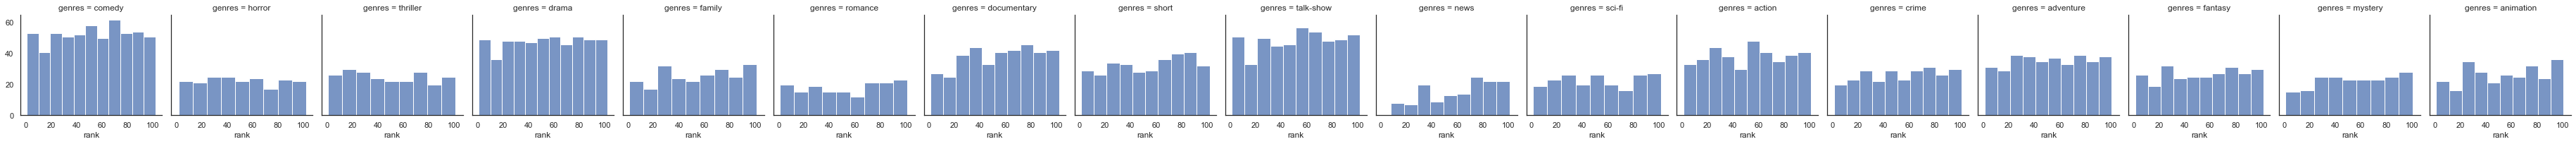

In [121]:
g = sns.FacetGrid(moviesDF, col="genres")
g.map(sns.histplot, "rank")


<AxesSubplot:xlabel='rank_date', ylabel='rank'>

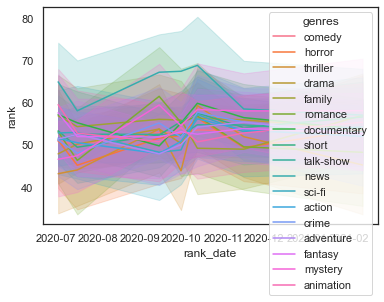

In [122]:
sns.lineplot(x="rank_date", y ='rank', hue="genres", data=moviesDF)

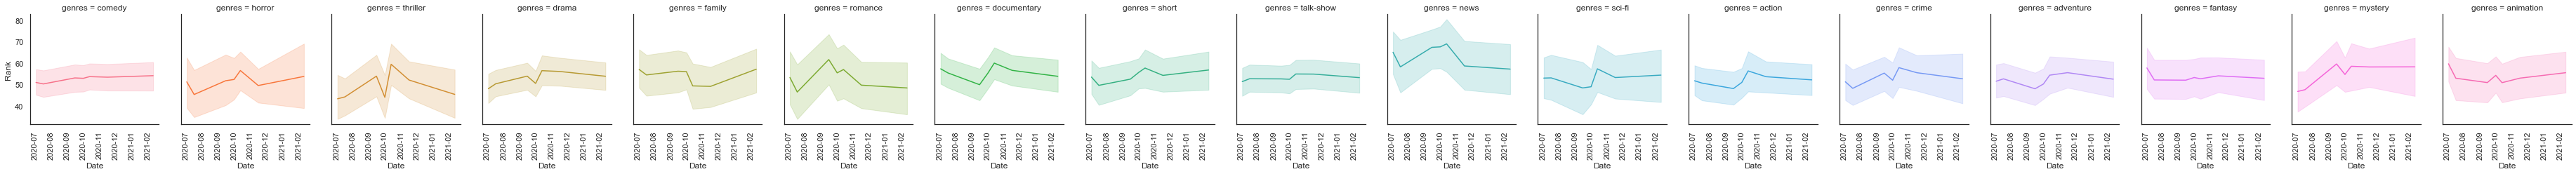

In [123]:
g = sns.FacetGrid(moviesDF, col="genres", hue="genres")
g.map_dataframe(sns.lineplot, x="rank_date", y="rank")
g.set_axis_labels("Date", "Rank")
g.set_xticklabels(rotation=90)


In [125]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

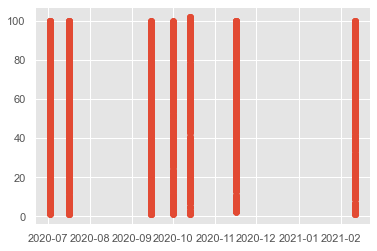

In [126]:
plt.scatter(moviesDF['rank_date'], moviesDF['rank'])

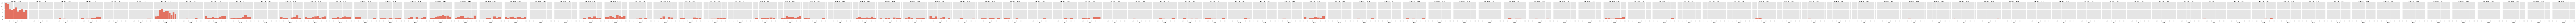

In [127]:
g = sns.FacetGrid(moviesDF , col="startYear")
g.map(sns.histplot, "rank")

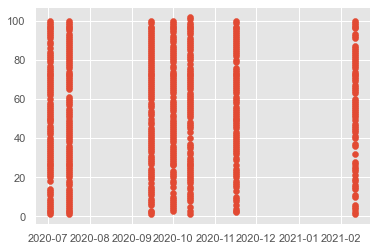

In [128]:
comedy = moviesDF[moviesDF['genres'] == 'comedy']
plt.scatter(comedy['rank_date'], comedy['rank'])

In [129]:
#I noticed that outlier. Went back to the website and its a mistake, the rank should be 80
moviesDF['rank'] = moviesDF['rank'].replace([833],80)
moviesDF.sort_values(by=['rank'], ascending = False)

,movie_name,rank,rank_date,startYear,genres
3644,the craft,102,2020-10-13,2018,short
3637,the craft,102,2020-10-13,1996,drama
3643,the craft,102,2020-10-13,2018,sci-fi
3642,the craft,102,2020-10-13,1993,documentary
3641,the craft,102,2020-10-13,2020,talk-show
...,...,...,...,...,...
2617,mulan,1,2020-09-15,2012,documentary
1624,hamilton,1,2020-07-17,2006,short
1623,hamilton,1,2020-07-17,2012,comedy
1622,hamilton,1,2020-07-17,2020,documentary


In [130]:
#dataFrame to compare ranks in each genre

movie_unstack = moviesDF.drop(['movie_name','startYear'], axis=1)#

movie_unstack['date']= movie_unstack['rank_date']
movie_unstack.drop(columns = 'rank_date')
movie_unstack = movie_unstack.groupby(['date', 'genres']).agg('mean').round(2) 

#new column per genre with the mean rank as value

movie_unstack = movie_unstack.unstack(level=-1)



#keep only the genres as the column names
movie_unstack.columns = movie_unstack.columns.droplevel(0)

#fill Na with 0
movie_unstack.fillna(0, inplace= True)
movie_unstack

genres,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,horror,mystery,news,romance,sci-fi,short,talk-show,thriller
date,,,,,,,,,,,,,,,,,
2020-07-03,51.64,51.43,59.59,50.86,51.18,57.24,47.92,56.94,57.66,51.14,46.64,65.00,53.19,52.90,53.38,51.25,43.21
2020-07-17,50.57,52.55,52.84,50.17,48.11,55.30,50.24,54.38,52.03,45.22,47.48,58.14,46.36,53.00,49.50,52.60,44.10
2020-09-15,48.00,47.91,50.80,52.98,55.24,49.81,53.81,56.12,51.92,51.67,59.52,67.30,61.58,48.30,52.40,52.53,53.81
2020-10-01,50.90,50.13,54.18,52.79,51.90,55.25,50.40,55.94,53.17,52.26,54.59,67.52,55.35,48.85,55.57,52.35,43.90
2020-10-13,56.25,54.28,50.76,53.59,57.79,59.92,56.37,49.25,52.58,56.44,58.44,68.92,56.90,57.24,57.61,54.82,59.38
2020-11-16,53.56,55.44,52.88,53.33,55.42,56.52,56.00,49.03,53.96,49.42,58.11,58.57,49.59,53.16,54.17,54.77,52.00
2021-02-11,52.07,52.40,55.42,54.03,52.59,53.74,53.76,57.06,52.81,53.68,58.17,57.11,48.29,54.30,56.68,53.12,45.28


/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


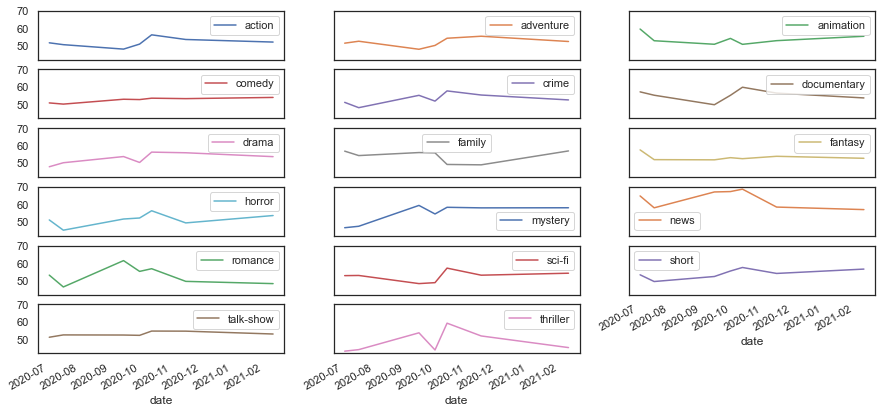

In [136]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

movie_unstack.plot(ax=ax, subplots=True, layout=(6, -1), sharex=True, sharey=True)
ax.set_ylim(0,100)

plt.show()

In [133]:
movie_unstack.to_csv('./DataBases/movie_unstack.csv', index= False)

In [134]:
#find correlation among genres

movie_corr = movie_unstack.corr()

<AxesSubplot:xlabel='genres', ylabel='genres'>

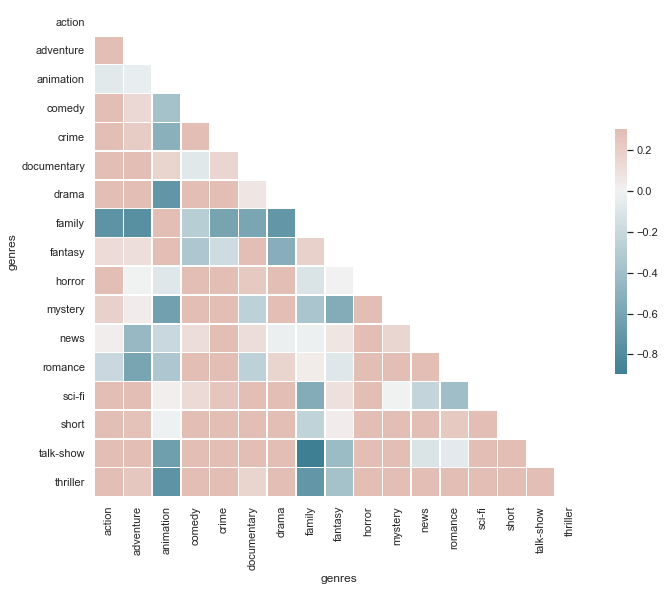

In [135]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(movie_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(movie_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})